# Inferential Statistics - Cheat Sheet
> *March 10, 2018*

<img src="img/statistics.jpg" style="float:left;max-height:300px;border:1px solid black">

This is a cheat sheet for making statistical inferences on datasets. Written in Python, it makes use of libraries numpy, pandas, scipy and matplotlib.

---

## Contents

1. **Significancy tests**
2. **Analysis of variance (ANOVA)**
3. **Correlation**
---

In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Significancy tests

In [2]:
from scipy.stats import norm, t, f, ttest_1samp, ttest_rel, ttest_ind, zscore

### Percentage tables

<img src="img/z-table.jpg" style="width:530px;display:inline-block;"/>
<img src="img/t-table.jpg" style="width:370px;display:inline-block;vertical-align:top"/>

Z-scores

In [3]:
ZSCORE = 1.96
print('Get Z-score from p-statistic: ', norm.ppf(.975))
print('Get p-statistic from Z-score: ', norm.cdf(ZSCORE), norm.sf(ZSCORE))
print()
print('Get CI from p-statistic: ', norm.interval(0.95))

Get Z-score from p-statistic:  1.95996398454
Get p-statistic from Z-score:  0.975002104852 0.0249978951482

Get CI from p-statistic:  (-1.959963984540054, 1.959963984540054)


P-scores

In [4]:
TSCORE = 1.65
DF = 999
print('Get T-score from p-statistic: ', t.ppf(.95, DF))
print('Get p-statistic from T-score: ', t.cdf(TSCORE, DF), t.sf(TSCORE, DF))
print()
print('Get CI/critical values from p-statistic: ', t.interval(0.95, DF))

Get T-score from p-statistic:  1.64638034543
Get p-statistic from T-score:  0.950371357874 0.0496286421255

Get CI/critical values from p-statistic:  (-1.9623414611334487, 1.9623414611334487)


### Helper functions

In [5]:
def gauss(x, position = 0.5, deviation = 0.1, height = 0, altitude = 1):
    return (np.exp(-np.square(x - position) / (2 * np.square(deviation))) + height) * altitude

def plotGauss(mu0, se, cv, mean, title, apa=''):
    fig = plt.figure(figsize=(9, 5))
    x = np.linspace(mu0 - 4*se, mu0 + 4*se, num=1000)
    plt.plot(x, gauss(x, mu0, se), '-k'); plt.ylim(0,1.2)
    #plt.fill_between(x, 0, gauss(x, mu0, se), alpha=0.2)
    
    # Sample mean
    plt.axvline(x=mean, color='r', ymax=gauss(mean, mu0, se)*0.83)
    plt.text(mean, gauss(mean, mu0, se)+.1, r'$\overline{x} =$' + str(round(mean, 3)))

    # Critical values
    ci = mu0 + cv * se
    plt.fill_between(x, 0, gauss(x, mu0, se), where=x<ci[0], color='r')
    plt.text(ci.item(0), 0.23, r'$cv =$' + str(round(ci.item(0), 3)))
    if ci.size == 2:
        plt.fill_between(x, 0, gauss(x, mu0, se), where=x>ci[1], color='r')
        plt.text(ci[1], 0.23, r'$cv =$' + str(round(ci[1], 3)))    
    
    # Standard errors
    for i in np.linspace(-3, 3, 7):
        plt.axvline(i*se+mu0, color='k', ymax=gauss(i*se+mu0, mu0, se)*0.83)
    
    plt.text(mu0, 1.1, r'$\mu_0 =$' + str(round(mu0, 3)))
    plt.text(mu0+se, 0.68, r'$\sigma =$' + str(round(se, 3)))
    plt.text(mu0+(-4*se), 0.9, apa)

    plt.title(title)
    plt.show()
    
def apa(df, T, p, kind):
    s = 't('+ str(df)+') = ' + str(round(T, 2))
    s += ', p = ' + str(round(p, 2)) + ', ' + kind
    return s

### One-sampled Z-test
Is there a significant difference between a sample and a given population distribution.

\begin{align} 
\overline{x} &= \frac{1}{n} \sum^n_{i=1}{x_i}\\
z &= \frac{  {\overline{x} - \mu_0}}{{\sigma}}
\end{align}

In [6]:
# Descriptive statistics
sample = norm.rvs(loc=7, scale=2, size=10)
mean = np.mean(sample)
mu0, sigma = 8, 2
print(mean)
print(sample)

8.06810506157
[  7.6794724   11.71087072   5.61074097   9.06924724   6.67284186
   7.92603507   8.32045294  10.05422854   6.84825733   6.78890354]


In [7]:
# Inferential statistics
Z = (mean - mu0) / sigma
p = norm.cdf(Z)*2
cv = np.array(norm.interval(.95))
print(Z, p, cv)

0.0340525307869 1.02716473855 [-1.95996398  1.95996398]


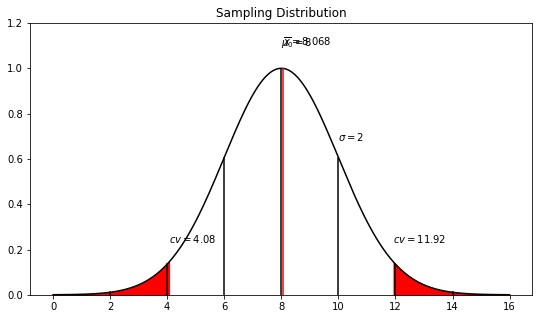

In [8]:
plotGauss(mu0, sigma, cv, mean, 'Sampling Distribution')

### One-sampled t-test
Is there a significant difference between a sample and a given population mean.

\begin{align} 
\overline{x} &= \frac{1}{n} \sum^n_{i=1}{x_i}
&&s = \sqrt{\frac{ \sum^n_{i=1}{(x_i - \overline{x})^2} }{n-1}} \\
s_e &= \frac{s}{\sqrt{n}}
&&t = \frac{  {\overline{x} - \mu_0}}{s_e}\\
d &= \frac{  {\overline{x} - \mu_0}}{s}
&&r^2 = \frac{t^2}{t^2+df}
\end{align}

In [9]:
# Descriptive statistics
sample = norm.rvs(loc=6, scale=2, size=15)
n, mean, sd = len(sample), np.mean(sample), np.std(sample)
print(mean, sd)
print(sample)

5.90642880753 1.53931221268
[ 3.55266987  5.92319947  8.20772115  7.22952999  5.38942244  5.97732085
  4.68615153  6.58035982  3.09696364  6.17329359  6.41095743  8.79409822
  5.53257999  4.15261529  6.88954881]


In [10]:
# Inferential statistics
mu0 = 5.5
cv = np.array(t.interval(.95, n-1)) # t.ppf(.05, 24) one-tailed
se = sd / np.sqrt(n)
T = (mean - mu0) / se
p = t.cdf(T, n-1)*2
print(T, p, cv)
print(ttest_1samp(sample, mu0))

1.0225943704 1.67615416526 [-2.14478669  2.14478669]
Ttest_1sampResult(statistic=0.98792001867000856, pvalue=0.33995935037402203)


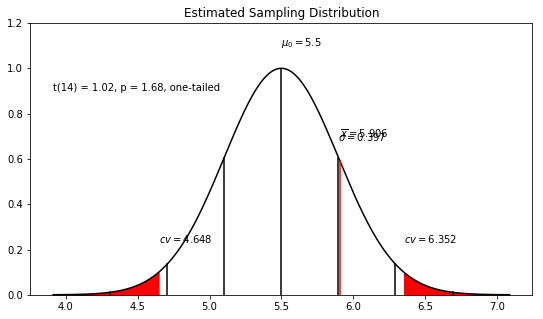

In [11]:
plotGauss(mu0, se, cv, mean, 'Estimated Sampling Distribution', apa(n-1, T, p, 'one-tailed'))

### Paired sampled t-test
Is there a significant difference between two dependent samples.

\begin{align}
x_i &= y_i - z_i\\
\overline{x} &= \frac{1}{n} \sum^n_{i=1}{x_i}
&&s = \sqrt{\frac{ \sum^n_{i=1}{(x_i - \overline{x})^2} }{n-1}} \\
s_e &= \frac{s}{\sqrt{n}}
&&t = \frac{  {\overline{x} - \mu_0}}{s_e}
\end{align}

In [12]:
# Descriptive statistics
sample1 = norm.rvs(loc=5.8, scale=2, size=15)
sample2 = norm.rvs(loc=6.1, scale=2, size=15)
sample = sample1 - sample2
n, mean, sd = len(sample), np.mean(sample), np.std(sample)
print(mean, sd)
print(sample)

-0.994695656215 1.90889740658
[-4.4951833  -1.11696477  1.41455432 -1.10431903  2.0588363  -0.75122838
 -1.4013749  -2.0162758  -4.60279641 -2.18351851 -0.55490209 -0.50757731
 -0.11293975  2.14469657 -1.69144178]


In [13]:
# Inferential statistics
mu0 = 0 # No difference
se = sd / np.sqrt(n-1)
T = (mean - mu0) / se
p = t.cdf(T, n-1)*2
cv = np.array(t.interval(.95, n -1))
print(T, p, cv)
print(ttest_rel(sample1, sample2))

-1.94971732731 0.0715290904481 [-2.14478669  2.14478669]
Ttest_relResult(statistic=-1.9497173273086565, pvalue=0.071529090448077412)


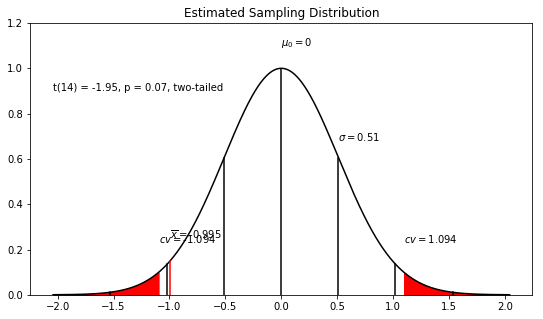

In [14]:
plotGauss(mu0, se, cv, mean, 'Estimated Sampling Distribution', apa(n-1, T, p, 'two-tailed'))

### Two sampled t-test
Is there a significant difference between independent samples.

\begin{align}
\overline{x} &= \frac{1}{n} \sum^n_{i=1}{x_i}
&&\overline{y} = \frac{1}{m} \sum^n_{i=1}{y_i}\\
s_x &= \sqrt{{\frac{ \sum^n_{i=1}{(x_i - \overline{x})^2} }{n-1}}} 
&& s_y = \sqrt{{\frac{ \sum^m_{i=1}{(y_i - \overline{y})^2} }{m-1}}} \\
s_p &= \sqrt{\frac{(n-1)s^2_x + (m-1)s^2_y}{n+m-2}}
&&s_e = s_p\sqrt{\frac{1}{n}+\frac{1}{m}}\\
s_e &= \sqrt{\frac{s_x^2}{n}+\frac{s_y^2}{m}}
&&t = \frac{  {\overline{x} - \overline{y}}} {s_e}
\end{align}

In [15]:
# Descriptive statistics
sample1 = norm.rvs(loc=5.8, scale=2, size=15)
sample2 = norm.rvs(loc=6.1, scale=2, size=10)
n, mean1, sd1 = len(sample1), np.mean(sample1), np.std(sample1)
m, mean2, sd2 = len(sample2), np.mean(sample2), np.std(sample2)
print(mean1, sd1, mean2, sd2)
print(sample1)
print(sample2)

5.34475322342 1.55292704505 6.99384701327 1.77134732746
[ 5.24876188  5.46446743  5.56385678  7.45703975  1.45385609  5.19387928
  5.2957294   5.67422097  6.45336847  2.44857385  7.62203964  6.21636964
  4.74128814  5.32932115  6.00852587]
[  7.97149678   5.2476218    3.93136577  10.74105381   7.33228686
   6.63968299   8.02685325   7.91117449   5.8562869    6.28064749]


In [16]:
# Inferential statistics
mu0 = 0
#sp = np.sqrt(((n-1) * np.power(sd1, 2) + (m-1) * np.power(sd2, 2)) / (n + m - 2))
#se = sp * np.sqrt((1/float(n)+1/float(m)))
se = np.sqrt((np.power(sd1, 2) / n) + (np.power(sd2, 2) / m))
T = (mean1 - mean2) / se
p = t.cdf(T, n+m-2)*2
cv = np.array(t.interval(.95, n + m - 2))
print(T, p, cv)
print(ttest_ind(sample1, sample2))

-2.39391797358 0.0252154928215 [-2.06865761  2.06865761]
Ttest_indResult(statistic=-2.357060756922233, pvalue=0.027306471155676908)


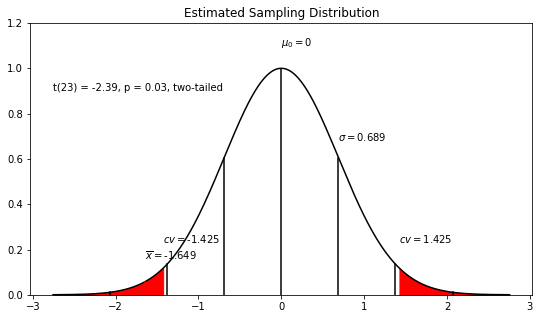

In [17]:
plotGauss(mu0, se, cv, mean1 - mean2, 'Estimated Sampling Distribution', apa(n+m-2, T, p, 'two-tailed'))

### Cohen's d and r squared

\begin{align}
s_p &= \sqrt{\frac{(n-1)s^2_x + (m-1)s^2_y}{n+m-2}}\\
d &= \frac{  {\overline{x} - \overline{y}}} {s_p}
&r^2 = \frac{t^2}{t^2+df}
\end{align}

## 2. Analysis of variance - Anova

In [18]:
from scipy.stats import f, f_oneway

Is there a significant difference between any two of more independent samples.

\begin{align}
F &= \frac{between\ group\ variability}{within\ group\ variablilty} 
= \frac{\sum^k_{k=1}{n_k(\overline{x}_k-\overline{x}_G)^2}\ /\ (k-1)}{\sum^k_{k=1}{(\overline{x}_i-\overline{x}_k)^2}\ /\ (N-k)}
= \frac{SS_{between}\ /\ df_{between}}{SS_{within}\ /\ df_{within}}
= \frac{MS_{between}}{MS_{within}}
\end{align}

Descriptive statistics

In [19]:
samples = np.array([norm.rvs(m, s, n) for (m, s, n) in [(2, 2, 100), (10, 5, 100), (30, 2, 100)]])
statistics = [(np.mean(sample), np.std(sample), len(sample)) for sample in samples]
statistics

[(2.094173107074305, 1.9350378766122853, 100),
 (9.561416426219866, 5.0764789371860664, 100),
 (29.784116098294593, 1.8286790502280033, 100)]

* As the between group variability increases, the F-statistic increases as well.
* As the within group variability increases, the F-statistic decreases.

|Sample 1   |Sample 2   |Sample k   | Grand mean  |
|--:|--:|--:|--:|
| $x_1$  | $x_1$  |$x_1$  |   |   
| $x_2$  | $x_2$  |$x_2$  |   |   
| $x_3$  | $x_3$  |$x_3$  |   |   
| $x_{n}$  | $x_{n}$  |$x_{n}$  |   |   
|  $\overline{x}_k$ | $\overline{x}_k$  | $\overline{x}_k$  | $\overline{x}_G$  |

Inferential statistics

In [20]:
grandMean = samples.flatten().mean()
sampleMeans = np.array([x[0] for x in statistics])
sampleSizes = np.array([x[2] for x in statistics])

In [21]:
ssb = np.sum(np.power(sampleMeans - grandMean, 2) * sampleSizes)
ssw = np.sum([np.power(np.array(xi)-xk, 2) for xi, xk in zip(samples, sampleMeans)])
dfb = len(sampleSizes) - 1
dfw = len(samples.flatten()) - len(sampleSizes)

In [22]:
F = (ssb / dfb) / (ssw / dfw)
p = f.sf(F, dfb, dfw)
print(F, p)
print(f_oneway(samples[0], samples[1], samples[2]))

1855.09736511 1.52239119152e-168
F_onewayResult(statistic=1855.0973651084048, pvalue=1.5223911915159777e-168)


Critical values, link to <a href="http://www.socr.ucla.edu/applets.dir/f_table.html">F-table</a>.

In [23]:
Fcrit = f.ppf(0.95, dfb, dfw)
print(Fcrit, 'Null hypothesis rejected?', F > Fcrit)

3.02615336857 Null hypothesis rejected? True


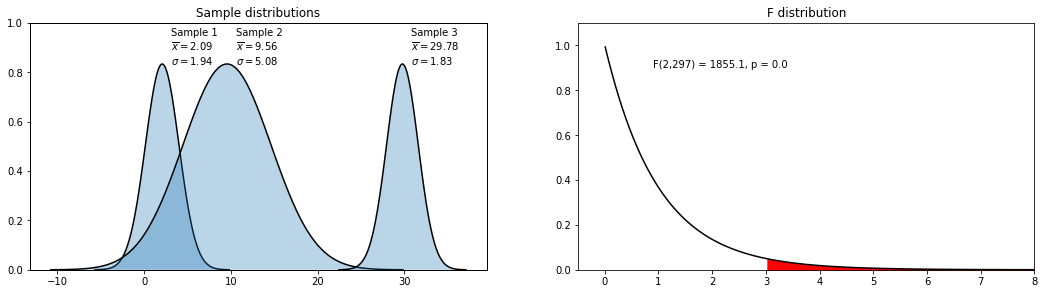

In [24]:
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(221); ax2 = fig.add_subplot(222)

for i, (m, s, n) in enumerate(statistics):
    ax = ax1.twinx()
    x = np.linspace(m-4*s, m+4*s, num=100)
    ax.plot(x, gauss(x, m, s), '-k')
    ax.fill_between(x, 0, gauss(x, m, s), alpha=0.3)
    ax.text(m+1, 1., 'Sample '+ str(i+1)+'\n' +
             r'$\overline{x} =$' + str(round(m, 2)) + '\n' + 
             r'$\sigma =$' + str(round(s, 2)))
    ax.set_ylim(0,1.2); ax.get_yaxis().set_visible(False)
ax1.set_title('Sample distributions')

x = np.linspace(0, 8, num=1000)
ax2.plot(x, f.pdf(x, dfb, dfw), '-k')
#ax2.fill_between(x, 0, f.pdf(x, dfb, dfw), alpha=0.2)
ax2.fill_between(x, 0, f.pdf(x, dfb, dfw), where=x>Fcrit, color='r')
ax2.axvline(x=F, color='r', ymax=f.pdf(F, dfb, dfw)*0.9)
ax2.set_ylim(0,1.1); ax2.set_xlim(-.5,8)
ax2.set_title('F distribution')

s = 'F('+ str(dfb)+','+str(dfw)+') = ' + str(round(F, 2)) + ', p = ' + str(round(p, 2))
ax2.text(0.9, 0.9, s)

plt.show()

### Multiple Comparison Test - Tuckey's HSD

\begin{align}
Tuckey's\ HSD = q\ \sqrt{\frac{MS_{within}}{n}}
= q\ \frac{s_p}{\sqrt{n}}
\end{align}

Critical values, link to [Q-table](https://www2.stat.duke.edu/courses/Spring98/sta110c/qtable.html). If mean differences exceeds critical value, variables are honestly significantly different.

In [25]:
msw = ssw / dfw
hsd = 3.34* np.sqrt(msw / sampleSizes[0])
hsd

1.1109536049453774

In [26]:
print(sampleMeans[2] - sampleMeans[1])
print(sampleMeans[2] - sampleMeans[0])
print(sampleMeans[1] - sampleMeans[0])

20.2226996721
27.6899429912
7.46724331915


### Cohen's d and $\eta$ squared test

\begin{align}
d &= \frac{  {\overline{x} - \overline{y}}} {\sqrt{{MS_{within}}}} = \frac{  {\overline{x} - \overline{y}}} {s_p}\\\\
\eta &= \frac{SS_{between}}{SS_{between} + SS_{within}}
\end{align}

In [27]:
den = np.sqrt(ssw / dfw)
d1 = (sampleMeans[2] - sampleMeans[1]) / den
d2 = (sampleMeans[2] - sampleMeans[0]) / den
d3 = (sampleMeans[1] - sampleMeans[0]) / den
print(d1, d2, d3)

6.07980536757 8.32477694649 2.24497157891


In [28]:
eta = ssb / (ssb + ssw)
print(eta)

0.925883312393


## 3. Correlation

In [29]:
from scipy.stats import pearsonr, t

$r^2$ is the percentage of the variation in $y$ explained by the variation in $x$. 

$t$ is used in a t-test to verify whether $\rho$ (the estimated population correlation) expresses correlation.

\begin{align}
r &= \frac{Cov\ (x,y)}{s_x\ s_y}
= \frac{\sum_{i=1}^n{(x_i - \overline{x})(y_i - \overline{y})\ /\ (n - 1)}}{{s_x\ s_y}} \\\\
t &= \frac{r\sqrt{df}}{1 - r^2} &df = n-2
\end{align}

Descriptive statistics

In [30]:
sample1 = norm.rvs(10, 2, 200)
sample2 = (sample1 + norm.rvs(0, 1.5, 200)) * -10
n, mean1, sd1 = len(sample1), np.mean(sample1), np.std(sample1)
m, mean2, sd2 = len(sample2), np.mean(sample2), np.std(sample2)
print(mean1, sd1)
print(mean2, sd2)

9.98295915068 2.0299347956
-101.126237664 25.633613391


Inferential statistics

In [31]:
r = (((sample1 - mean1) * (sample2 - mean2)).sum() / (n - 1)) / (sd1 * sd2)
r = (n * (sample1*sample2).sum() - sample1.sum()*sample2.sum()) / np.sqrt((n*np.power(sample1, 2).sum() - np.power(sample1.sum(), 2)) * (n*np.power(sample2, 2).sum() - np.power(sample2.sum(), 2)))
T = (r * np.sqrt(n-2)) / (1 - np.power(r, 2))
p = t.sf(T, n-1)
slope = r * sd2 / sd1
intercept = mean2 - slope * mean1
print(r, T, p)
print(pearsonr(sample1, sample2))
print(slope, intercept)

-0.824604443675 -36.2569236043 1.0
(-0.82460444367507313, 7.0687309919977761e-51)
-10.4129411228 2.82572820259


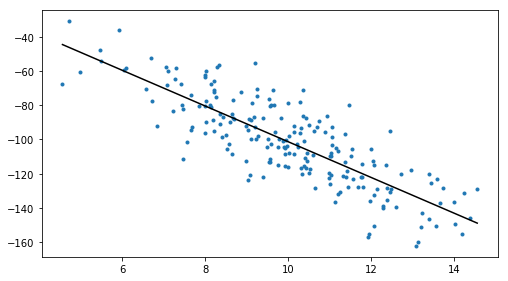

In [32]:
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(221)
ax.scatter(sample1, sample2, marker='.')
x = np.linspace(min(sample1), max(sample1), num=1000)
ax.plot(x, slope * x + intercept, color='k')
plt.show()